In [2]:
from qiskit.circuit.random import random_circuit

from circuit_knitting.cutting.gate_and_wire_cutting.frontend import cut_wires_and_gates_to_subcircuits
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import execute_simulation
from circuit_knitting.cutting.cutting_reconstruction import reconstruct_expectation_values
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import exact_observables
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import compare_results

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


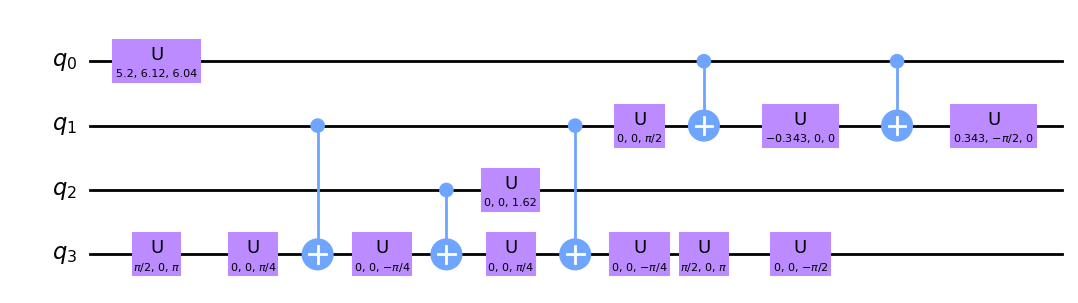

In [3]:
q = 4

circuit = random_circuit(q, 2, measure=False).decompose(reps=3)
circuit.draw('mpl')

In [4]:
observables = ['Z'*q]

If there is an error in the below cell, simply re-create the random circuit. An error suggests that not all qubits are entangled, and therefore do not even require cutting in the first place. 

In [9]:
subcircuits, subobservables = cut_wires_and_gates_to_subcircuits(
    circuit=circuit,
    observables=observables,
    method='automatic',
    max_subcircuit_width=2,
    max_cuts=4,
    num_subcircuits=[2],
    model='gurobi'
)

Set parameter TimeLimit to value 300
Set parameter Cutoff to value 1e+100
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 131 rows, 65 columns and 410 nonzeros
Model fingerprint: 0x5e096a1a
Variable types: 0 continuous, 65 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e-02, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 2e+00]
Presolve removed 131 rows and 65 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%
MIP MODEL CUT EDG

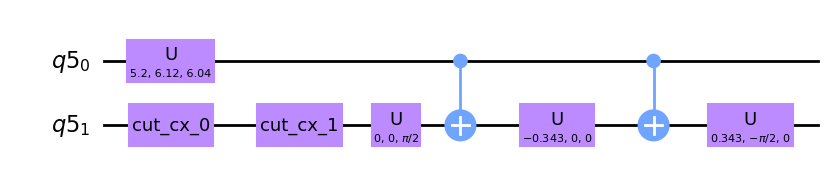

In [10]:
subcircuits[0].draw('mpl')

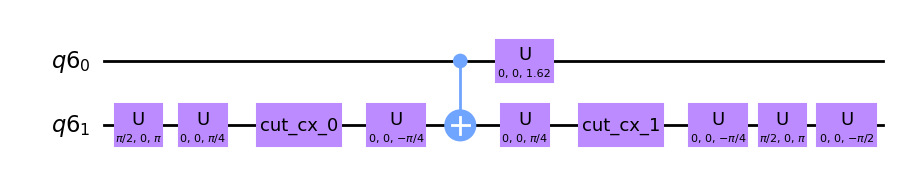

In [11]:
subcircuits[1].draw('mpl')

In [12]:
# Execute the subcircuits
quasi_dists, coefficients = execute_simulation(subcircuits, subobservables)

simulation_expvals = reconstruct_expectation_values(quasi_dists, coefficients, subobservables)
simulation_expvals

[0.5487228035926817]

In [13]:
# Create ideal results
ideal_expvals = exact_observables(circuit, observables)
ideal_expvals

array([0.5295237])

In [14]:
# Compare the error between results
compare_results(simulation_expvals, ideal_expvals)

Simulated expectation values: [0.5487228]
Exact expectation values: [0.5295237]
Errors in estimation: [0.0191991]
Relative errors in estimation: [0.03625731]
